In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [174]:
df=pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [176]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [177]:
df.shape

(10683, 11)

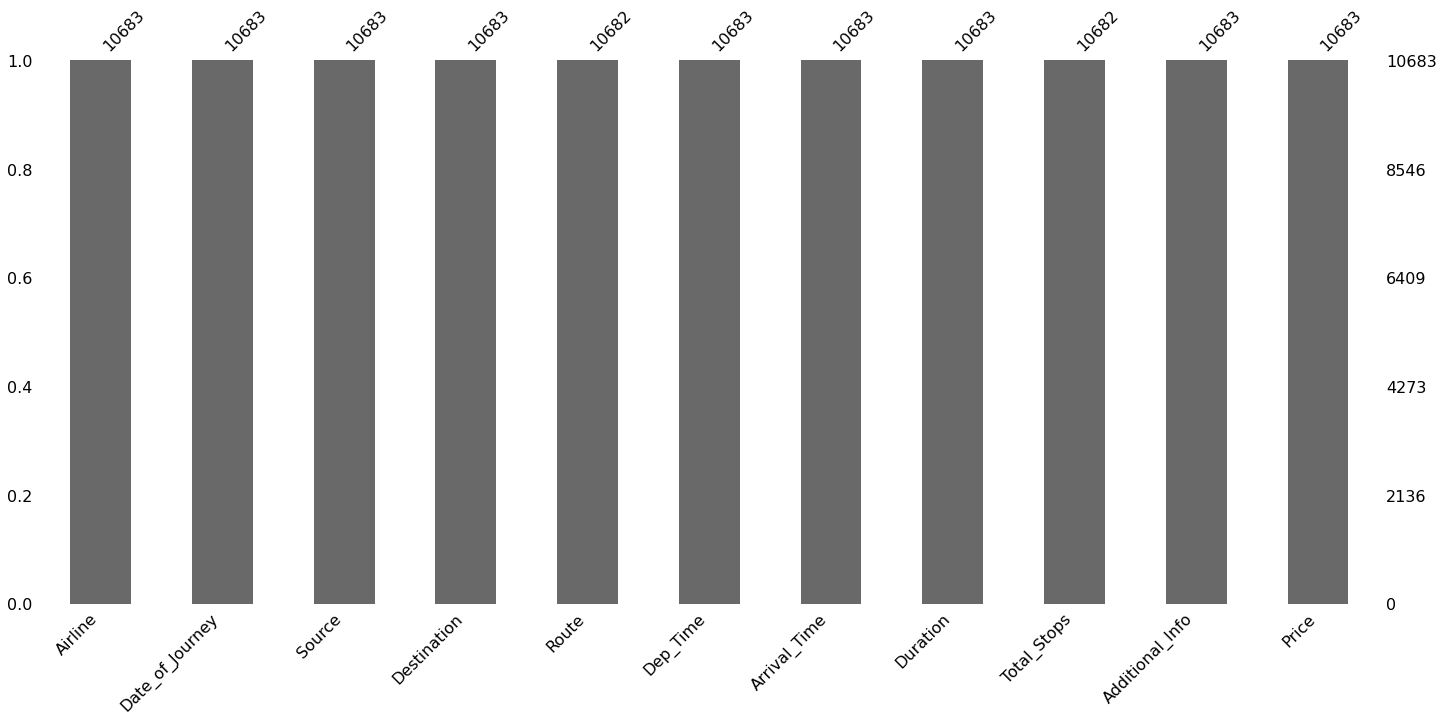

In [178]:
import missingno as mno
mno.bar(df)
plt.show()

In [179]:
df.dropna(inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [180]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [181]:
def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])

In [182]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(i)


In [183]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [184]:
df['journey_day']=df['Date_of_Journey'].dt.day
df['journey_month']=df['Date_of_Journey'].dt.month

In [185]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-05-24 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-24 05:50:00,2021-05-24 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-05-24 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-05-24 18:05:00,2021-05-24 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-05-24 16:50:00,2021-05-24 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [186]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [187]:
def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour
def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute
    
def drop_shit(data,col):
    data.drop(col,axis=1,inplace=True)

In [188]:
extract_hour(df,'Dep_Time')
extract_min(df,'Dep_Time')
drop_shit(df,'Dep_Time')

In [189]:
extract_hour(df,'Arrival_Time')
extract_min(df,'Arrival_Time')
drop_shit(df,'Arrival_Time')
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [190]:
df.shape

(10682, 14)

In [191]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]=duration[i]+' 0m'
        else:
            duration[i]='0h '+duration[i]

In [192]:
df['Duration']=duration


In [193]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [194]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]


In [195]:
df['dur_hour']=df['Duration'].apply(hour)
df['dur_min']=df['Duration'].apply(minutes)

In [196]:

df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [197]:
drop_shit(df,'Duration')


In [198]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
dur_hour             object
dur_min              object
dtype: object

In [199]:
df['dur_hour']=df['dur_hour'].astype(int)
df['dur_min']=df['dur_min'].astype(int)

In [200]:
column=[column for column in df.columns if df[column].dtype=='object']
column

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [201]:
cont_col=[column for column in df.columns if df[column].dtype!='object']
cont_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'dur_hour',
 'dur_min']

# MANAGING CATEGORICAL DATA
NOMINAL DATA IS ONE HOT ENCODED



ORDINAL DATA IS LABEL ENCODED

In [202]:
categorical =df[column]

In [203]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

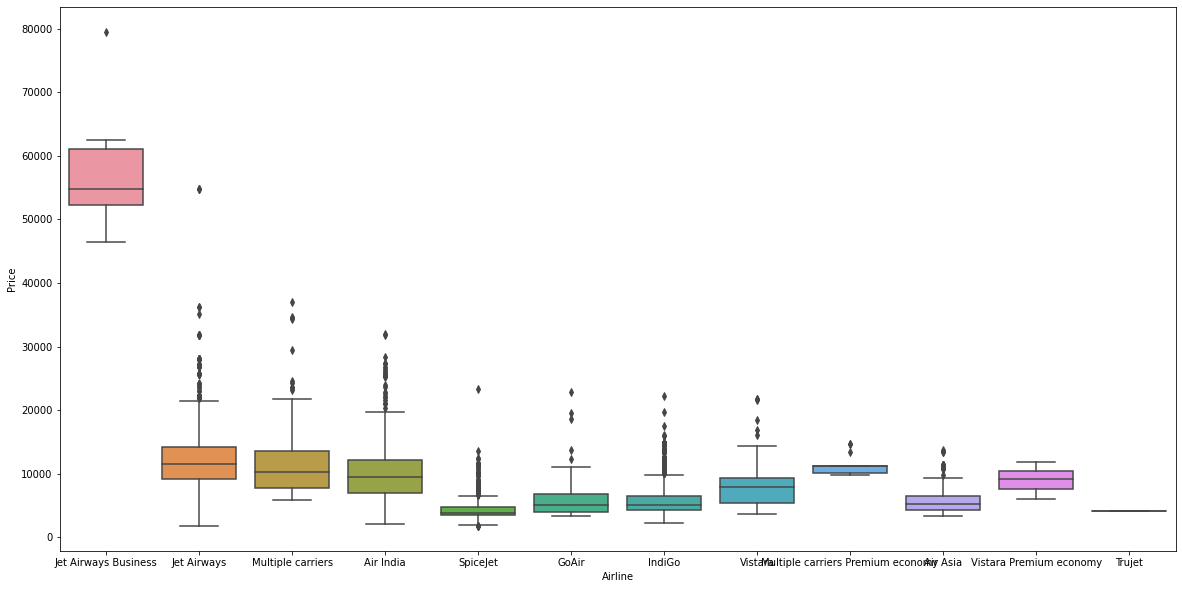

In [204]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

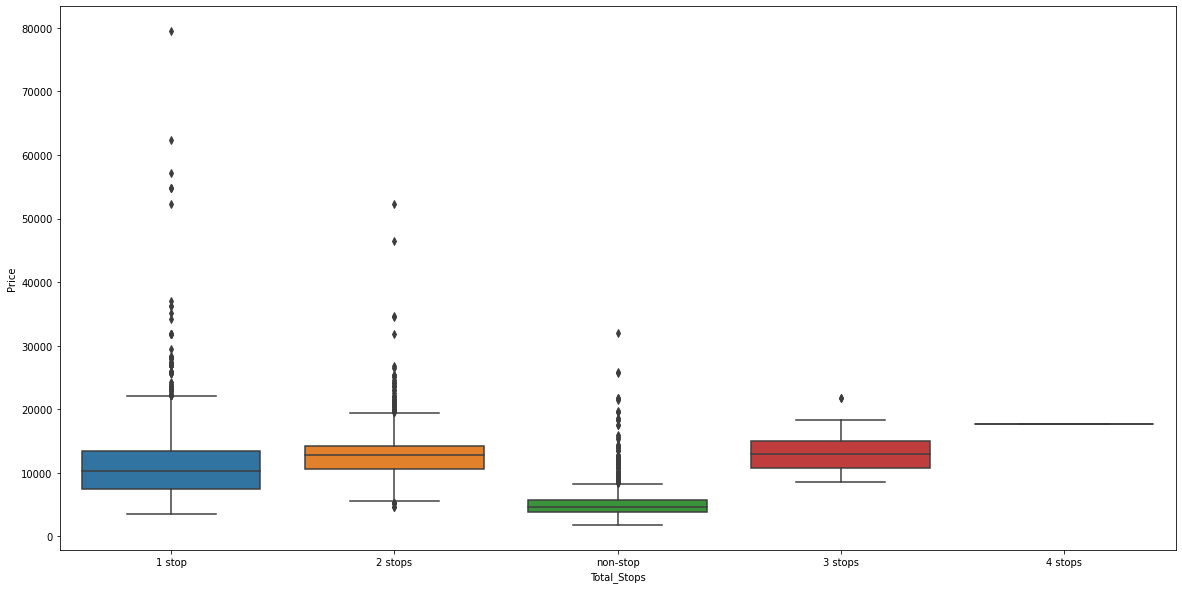

In [205]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Total_Stops',y='Price',data=df.sort_values('Price',ascending=False))

#### SINCE AIRLINE IS NOMINAL DATA we use ONE HOT ENCODING

In [206]:
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)

In [207]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [208]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<Figure size 1440x720 with 0 Axes>

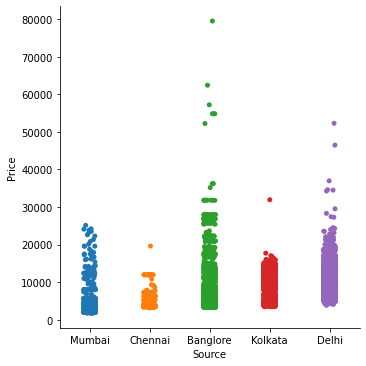

In [209]:
plt.figure(figsize=(20,10))
sns.catplot(x='Source',y='Price',data=df.sort_values('Price',ascending=True))

In [210]:
Source=pd.get_dummies(categorical['Source'],drop_first=True)

In [211]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<Figure size 1440x720 with 0 Axes>

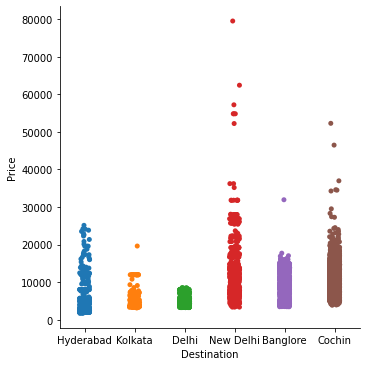

In [212]:
plt.figure(figsize=(20,10))
sns.catplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=True))

In [213]:
destination=pd.get_dummies(categorical['Destination'],drop_first=True)

In [214]:
categorical['Route'].value_counts()

DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
                                     ... 
BOM → RPR → VTZ → HYD                   1
BLR → CCU → BBI → HYD → VGA → DEL       1
BLR → BOM → IXC → DEL                   1
BOM → BLR → CCU → BBI → HYD             1
BOM → BBI → HYD                         1
Name: Route, Length: 128, dtype: int64

In [215]:
categorical['Route1']=categorical['Route'].str.split('→').str[0]
categorical['Route2']=categorical['Route'].str.split('→').str[1]
categorical['Route3']=categorical['Route'].str.split('→').str[2]
categorical['Route4']=categorical['Route'].str.split('→').str[3]
categorical['Route5']=categorical['Route'].str.split('→').str[4]

In [216]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [217]:
drop_shit(categorical,'Route')

In [218]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route1                 0
Route2                 0
Route3              3491
Route4              9116
Route5             10636
dtype: int64

In [219]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [220]:
for i in ['Route3', 'Route4', 'Route5']:
    categorical[i].fillna('None',inplace=True)

In [221]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

In [222]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route1 has total 5 categories
Route2 has total 45 categories
Route3 has total 30 categories
Route4 has total 14 categories
Route5 has total 6 categories


#### NOW LABEL ENCODING


In [223]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

In [224]:
for i in ['Route1','Route2','Route3','Route4','Route5']:
    categorical[i]=encoder.fit_transform(categorical[i])


In [225]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [226]:
drop_shit(categorical,'Additional_Info')

In [227]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [228]:
dict={
    'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4
}
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [229]:
drop_shit(categorical,'Source')
drop_shit(categorical,'Destination')
drop_shit(categorical,'Airline')

### now we only have numbers in our dataset hence it has been processed.
TIME TO FIND MODEL XD.

In [230]:
f=pd.concat([categorical,Airline,Source,destination,df[cont_col]],axis=1)

In [231]:
f.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,50,21,35,4,45


In [232]:
f.shape

(10682, 35)

In [237]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

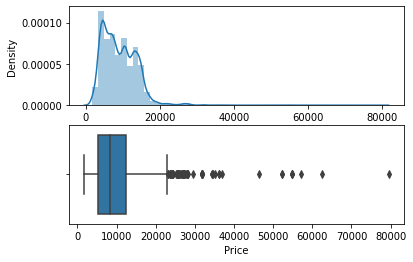

In [238]:
plot(f,'Price')

In [239]:
f['price']=np.where(f['Price']>=40000,f['Price'].median(),f['Price'])

#### dividing into X and Y

In [241]:
X=f.drop('Price',axis=1)
y=df['Price']

In [244]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

In [252]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print('model is: {}'.format(ml_model))
    model=ml_model.fit(X_train,y_train)
    print('Training score: {}'.format(model.score(X_train,y_train)))
    predictions =model.predict(X_test)
    print("predictions are :{}\n".format(predictions))
    r2score=r2_score(y_test,predictions)
    print("r2 score is:{}".format(r2score))
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
    
    sns.distplot(y_test-predictions)
          
          

In [253]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

model is: LogisticRegression()
Training score: 0.05184318314803979
predictions are :[ 4804 10262 10262 ... 10262  4804  4804]

r2 score is:0.5199059563231266
MAE:2128.867103416004
MSE:9847060.29714553
RMSE:3138.0025967397687


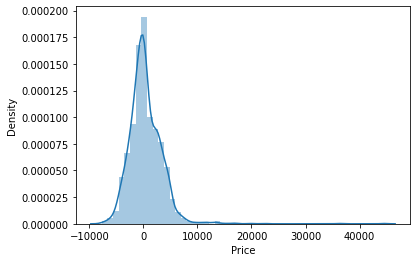

In [254]:
predict(LogisticRegression())

model is: RandomForestRegressor()
Training score: 0.996431246994745
predictions are :[ 4440.36 14151.   14151.   ... 14151.    6795.    3383.  ]

r2 score is:0.9673766746860548
MAE:30.60030416471691
MSE:669126.9256321479
RMSE:818.0017882817542


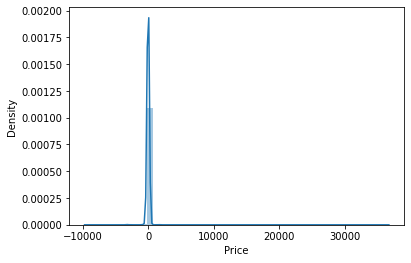

In [255]:
predict(RandomForestRegressor())

model is: KNeighborsRegressor()
Training score: 0.9406871067250563
predictions are :[ 4441. 14151. 14151. ... 14151.  6795.  3383.]

r2 score is:0.9248146479138517
MAE:58.051099672438
MSE:1542103.4799438461
RMSE:1241.814591613356


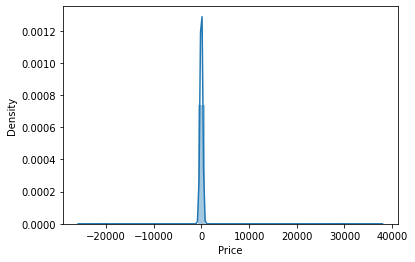

In [256]:
predict(KNeighborsRegressor())


model is: DecisionTreeRegressor()
Training score: 1.0
predictions are :[ 4441. 14151. 14151. ... 14151.  6795.  3383.]

r2 score is:0.9499574411243281
MAE:27.939635002339728
MSE:1026407.4323818437
RMSE:1013.1176794340545


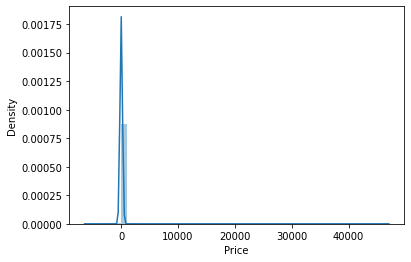

In [257]:
predict(DecisionTreeRegressor())

model is: DecisionTreeRegressor()
Training score: 1.0
predictions are :[ 4441. 14151. 14151. ... 14151.  6795.  3383.]

r2 score is:0.9499785801970956
MAE:28.15208235844642
MSE:1025973.855404773
RMSE:1012.9036752844631


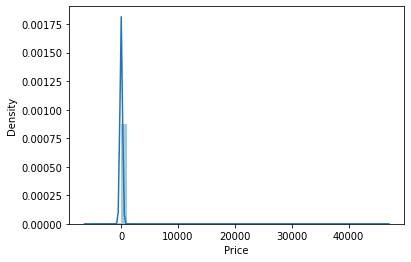

In [258]:
predict(DecisionTreeRegressor())

model is: SVR()
Training score: 0.43560967791305993
predictions are :[ 6903.14160796 10596.91924165 10596.90423391 ... 10596.90528875
  7681.31212979  6693.30432072]

r2 score is:0.44599345299920656
MAE:2290.7349171783612
MSE:11363056.770189611
RMSE:3370.913343619146


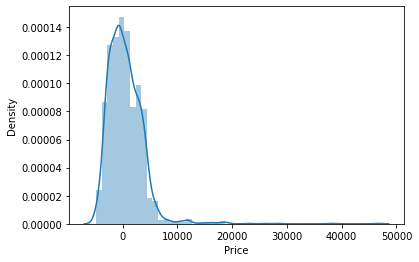

In [261]:
from sklearn.svm import SVR
predict(SVR())

model is: GradientBoostingRegressor()
Training score: 0.9919508562558367
predictions are :[ 4410.32828027 14267.70189324 14293.17804938 ... 14278.95518924
  6785.39709437  3381.05389517]

r2 score is:0.9643908441189202
MAE:84.88669810736522
MSE:730368.3720088985
RMSE:854.6159207555746


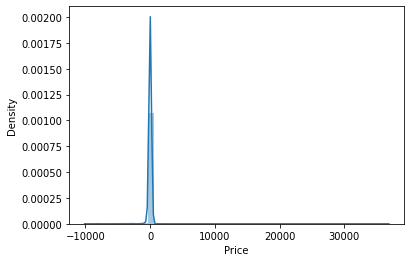

In [262]:
predict(GradientBoostingRegressor())